## Lecture7: MachineLearning_Classification

---
* Author:  [Yuttapong Mahasittiwat](mailto:khala1391@gmail.com)
* Technologist | Data Modeler | Data Analyst
* [YouTube](https://www.youtube.com/khala1391)
* [LinkedIn](https://www.linkedin.com/in/yuttapong-m/)
---

## Source
- File: [**Kaggle**](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)<br>
- Source: [**CPE353 Data Science** by **Santitham**](https://www.youtube.com/watch?v=GIGu4TlpJGs&t=5417s)

## Import Library

In [63]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
print("pandas version: ",pd.__version__)
print("numpy version: ",np.__version__)
print("matplotlib version: ", mpl.__version__)

pandas version:  2.2.1
numpy version:  1.26.4
matplotlib version:  3.8.4


In [13]:
import datetime
print(f"Last updated: {datetime.datetime.now()}")

Last updated: 2024-07-30 16:11:08.558656


In [27]:
pd.set_option('display.max_columns',50)

## Import Data

In [30]:
df = pd.read_csv('data/Telco-Customer-Churn.csv')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [32]:
df.shape

(7043, 21)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [36]:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [50]:
df[df['TotalCharges'] == ' ']

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
488            No  No phone service             DSL                  Yes   
753           Yes                No              No  No internet service   
936           Yes                No             DSL                  Yes   
1082          Yes               Yes              No  No internet service   
1340           No  No phone service             DSL                  Yes   
3331          Yes                No              No  No internet service   
3826          Yes               Yes              No  No internet service   
4380          Yes                No              No  No internet service   
5218          Yes                No              No  No internet service   
6670          Yes               Yes             DSL                   No   
6754          Yes               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85             

In [29]:
df.select_dtypes(include='object').head()

customerID  gender Partner Dependents PhoneService     MultipleLines  \
0  7590-VHVEG  Female     Yes         No           No  No phone service   
1  5575-GNVDE    Male      No         No          Yes                No   
2  3668-QPYBK    Male      No         No          Yes                No   
3  7795-CFOCW    Male      No         No           No  No phone service   
4  9237-HQITU  Female      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod TotalCharges Churn  
0           Electronic check        29.85    No  
1               Mailed check       1889.5    No  
2               Mailed check       108.15   Yes  
3  Bank transfer (automatic)      1840.75    No  
4           Electronic check       151.65   Yes

In [30]:
df.select_dtypes(include='number').head()

SeniorCitizen  tenure  MonthlyCharges
0              0       1           29.85
1              0      34           56.95
2              0       2           53.85
3              0      45           42.30
4              0       2           70.70

## EDA

### Set Index

In [31]:
df.set_index('customerID', inplace=True)
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                  
7590-VHVEG  Female              0     Yes         No       1           No   
5575-GNVDE    Male              0      No         No      34          Yes   
3668-QPYBK    Male              0      No         No       2          Yes   
7795-CFOCW    Male              0      No         No      45           No   
9237-HQITU  Female              0      No         No       2          Yes   

               MultipleLines InternetService OnlineSecurity OnlineBackup  \
customerID                                                                 
7590-VHVEG  No phone service             DSL             No          Yes   
5575-GNVDE                No             DSL            Yes           No   
3668-QPYBK                No             DSL            Yes          Yes   
7795-CFOCW  No phone service             DSL            Yes           No   
9237-HQITU                No     Fiber optic             No           No   

           DeviceProtection TechSupport StreamingTV StreamingMovies  \
customerID                                                            
7590-VHVEG               No          No          No              No   
5575-GNVDE              Yes          No          No              No   
3668-QPYBK               No          No          No              No   
7795-CFOCW              Yes         Yes          No              No   
9237-HQITU               No          No          No              No   

                  Contract PaperlessBilling              PaymentMethod  \
customerID                                                               
7590-VHVEG  Month-to-month              Yes           Electronic check   
5575-GNVDE        One year               No               Mailed check   
3668-QPYBK  Month-to-month              Yes               Mailed check   
7795-CFOCW        One year               No  Bank transfer (automatic)   
9237-HQITU  Month-to-month              Yes           Electronic check   

            MonthlyCharges TotalCharges Churn  
customerID                                     
7590-VHVEG           29.85        29.85    No  
5575-GNVDE           56.95       1889.5    No  
3668-QPYBK           53.85       108.15   Yes  
7795-CFOCW           42.30      1840.75    No  
9237-HQITU           70.70       151.65   Yes

### Data Cleaning

In [32]:
df[['TotalCharges']].sort_values(by='TotalCharges',ascending=True)

TotalCharges
customerID             
5709-LVOEQ             
3213-VVOLG             
2520-SGTTA             
3115-CZMZD             
2923-ARZLG             
...                 ...
8249-THVEC       997.75
6051-PTVNS        998.1
5899-MQZZL       999.45
4536-PLEQY        999.8
9093-FPDLG        999.9

[7043 rows x 1 columns]

In [33]:
df['TotalCharges']= df['TotalCharges'].replace(' ', '0', regex=True)

In [34]:
df[['TotalCharges']].sort_values(by='TotalCharges',ascending=True)

TotalCharges
customerID             
5709-LVOEQ            0
3213-VVOLG            0
2520-SGTTA            0
3115-CZMZD            0
2923-ARZLG            0
...                 ...
8249-THVEC       997.75
6051-PTVNS        998.1
5899-MQZZL       999.45
4536-PLEQY        999.8
9093-FPDLG        999.9

[7043 rows x 1 columns]

### Data Type

In [35]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [36]:
df = df.astype({
            #'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
            #'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            #'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            #'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
            #'MonthlyCharges', 
            'TotalCharges': 'float32',
            #'Churn'
            })

In [69]:
df_object = df.select_dtypes(include='object')
df_object.head()

gender Partner Dependents PhoneService     MultipleLines  \
customerID                                                             
7590-VHVEG  Female     Yes         No           No  No phone service   
5575-GNVDE    Male      No         No          Yes                No   
3668-QPYBK    Male      No         No          Yes                No   
7795-CFOCW    Male      No         No           No  No phone service   
9237-HQITU  Female      No         No          Yes                No   

           InternetService OnlineSecurity OnlineBackup DeviceProtection  \
customerID                                                                
7590-VHVEG             DSL             No          Yes               No   
5575-GNVDE             DSL            Yes           No              Yes   
3668-QPYBK             DSL            Yes          Yes               No   
7795-CFOCW             DSL            Yes           No              Yes   
9237-HQITU     Fiber optic             No           No               No   

           TechSupport StreamingTV StreamingMovies        Contract  \
customerID                                                           
7590-VHVEG          No          No              No  Month-to-month   
5575-GNVDE          No          No              No        One year   
3668-QPYBK          No          No              No  Month-to-month   
7795-CFOCW         Yes          No              No        One year   
9237-HQITU          No          No              No  Month-to-month   

           PaperlessBilling              PaymentMethod Churn  
customerID                                                    
7590-VHVEG              Yes           Electronic check    No  
5575-GNVDE               No               Mailed check    No  
3668-QPYBK              Yes               Mailed check   Yes  
7795-CFOCW               No  Bank transfer (automatic)    No  
9237-HQITU              Yes           Electronic check   Yes

In [55]:
df_object.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [60]:
cols_object = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn']

In [61]:
len(df_object.columns)

16

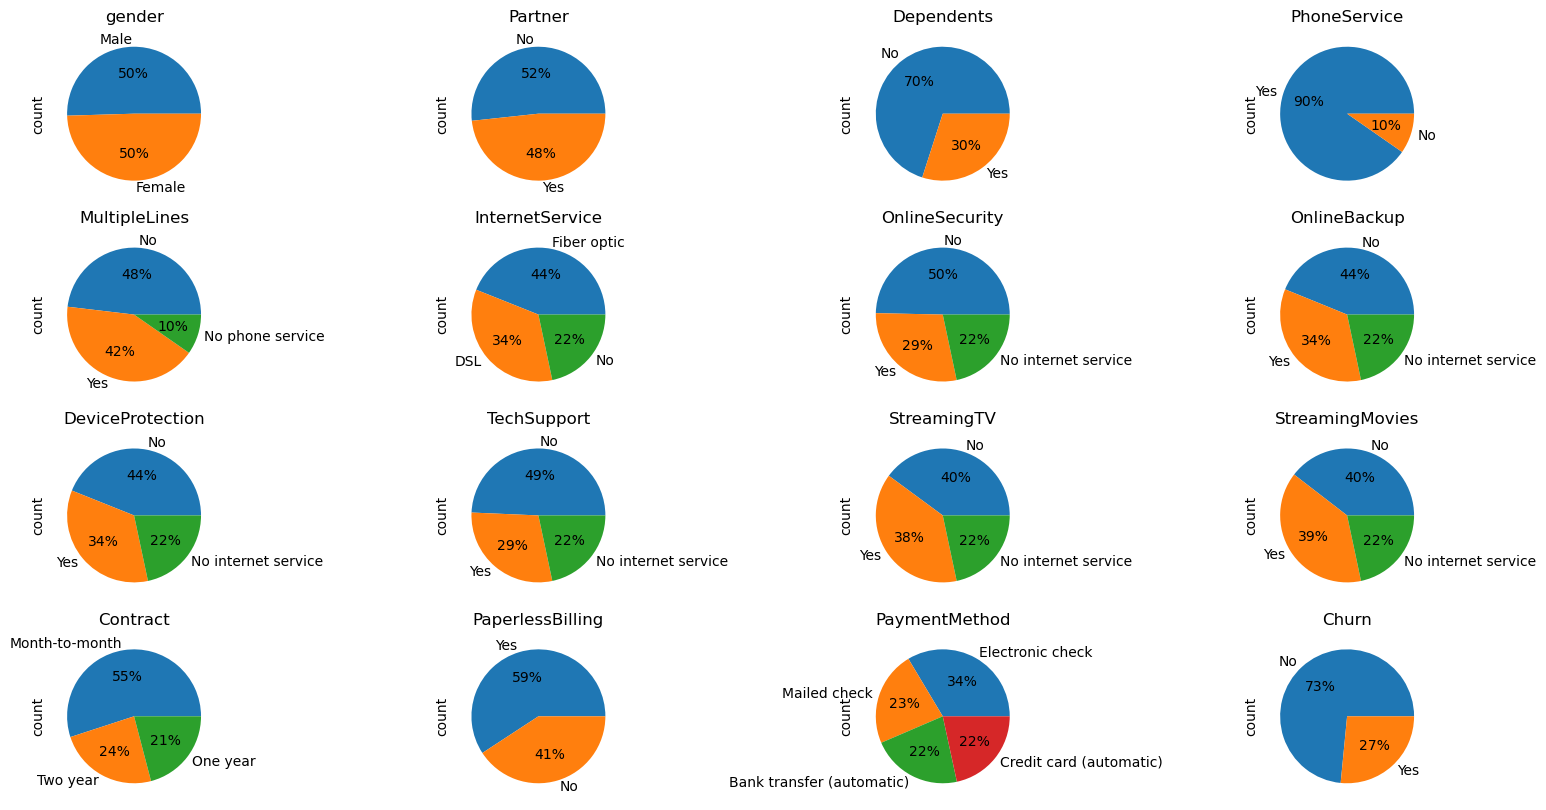

In [112]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 10))
ax = ax.ravel()

col_num = len(df_object.columns)
for i, col in enumerate(cols_object):
    count = df_object.iloc[:,i].value_counts()
    count.plot.pie(ax=ax[i], title=col, autopct='%1.0f%%')

In [135]:
col_num = len(df_object.columns)

for i in range(col_num):
    count = df_object.iloc[:,i].value_counts()
    print(count)
    print(' ')
    i += 1

gender
Male      3555
Female    3488
Name: count, dtype: int64
 
Partner
No     3641
Yes    3402
Name: count, dtype: int64
 
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
 
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
 
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
 
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
 
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
 
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
 
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
 
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
 
StreamingTV
No       

## Activity: Data prep
- get_dummies
- drop_first
- concat number

In [113]:
df_new = pd.get_dummies(df,drop_first=True,dtype='int16')
df_new

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
customerID                                                                     
7590-VHVEG              0       1           29.85     29.850000            0   
5575-GNVDE              0      34           56.95   1889.500000            1   
3668-QPYBK              0       2           53.85    108.150002            1   
7795-CFOCW              0      45           42.30   1840.750000            1   
9237-HQITU              0       2           70.70    151.649994            0   
...                   ...     ...             ...           ...          ...   
6840-RESVB              0      24           84.80   1990.500000            1   
2234-XADUH              0      72          103.20   7362.899902            0   
4801-JZAZL              0      11           29.60    346.450012            0   
8361-LTMKD              1       4           74.40    306.600006            1   
3186-AJIEK              0      66          105.65   6844.500000            1   

            Partner_Yes  Dependents_Yes  PhoneService_Yes  \
customerID                                                  
7590-VHVEG            1               0                 0   
5575-GNVDE            0               0                 1   
3668-QPYBK            0               0                 1   
7795-CFOCW            0               0                 0   
9237-HQITU            0               0                 1   
...                 ...             ...               ...   
6840-RESVB            1               1                 1   
2234-XADUH            1               1                 1   
4801-JZAZL            1               1                 0   
8361-LTMKD            1               0                 1   
3186-AJIEK            0               0                 1   

            MultipleLines_No phone service  MultipleLines_Yes  \
customerID                                                      
7590-VHVEG                               1                  0   
5575-GNVDE                               0                  0   
3668-QPYBK                               0                  0   
7795-CFOCW                               1                  0   
9237-HQITU                               0                  0   
...                                    ...                ...   
6840-RESVB                               0                  1   
2234-XADUH                               0                  1   
4801-JZAZL                               1                  0   
8361-LTMKD                               0                  1   
3186-AJIEK                               0                  0   

            InternetService_Fiber optic  InternetService_No  \
customerID                                                    
7590-VHVEG                            0                   0   
5575-GNVDE                            0                   0   
3668-QPYBK                            0                   0   
7795-CFOCW                            0                   0   
9237-HQITU                            1                   0   
...                                 ...                 ...   
6840-RESVB                            0                   0   
2234-XADUH                            1                   0   
4801-JZAZL                            0                   0   
8361-LTMKD                            1                   0   
3186-AJIEK                            1                   0   

            OnlineSecurity_No internet service  OnlineSecurity_Yes  \
customerID                                                           
7590-VHVEG                                   0                   0   
5575-GNVDE                                   0                   1   
3668-QPYBK                                   0                   1   
7795-CFOCW                                   0                   1   
9237-HQITU                                   0                   0   
...                  

In [114]:
col_num = len(df_new.columns)

for i in range(col_num):
    print(df_new.iloc[:,i].value_counts())
    print(' ')
    i += 1

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
 
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
 
MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64
 
TotalCharges
0.000000       11
20.200001      11
19.750000       9
20.049999       8
19.900000       8
               ..
6849.399902     1
692.349976      1
130.149994      1
3211.899902     1
6844.500000     1
Name: count, Length: 6531, dtype: int64
 
gender_Male
1    3555
0    3488
Name: count, dtype: int64
 
Partner_Yes
0    3641
1    3402
Name: count, dtype: int64
 
Dependents_Yes
0    4933
1    2110
Name: count, dtype: int64
 
PhoneService_Yes
1    6361
0     682
Name: count, dtype: int64
 
MultipleLines_No phone service
0    6361
1     682
Name: count, dtype: int64
 
M

## Activity: Sample data
- train 70%, test 30%
- check distribution

In [128]:
df_train = df_new.sample(frac=0.7, random_state= 42)
df_test = df_new.drop(index=df_train.index)

df_train.shape,  df_test.shape

((4930, 31), (2113, 31))

In [129]:
pd.crosstab(index = df_train['Churn_Yes'], columns='P',normalize=True)

col_0             P
Churn_Yes          
0          0.730426
1          0.269574

In [130]:
pd.crosstab(index = df_test['Churn_Yes'], columns='P',normalize=True)

col_0             P
Churn_Yes          
0          0.744439
1          0.255561

## train decision tree model

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
tree = DecisionTreeClassifier(min_samples_leaf=10)
tree.fit(df_train.drop(columns='Churn_Yes'), df_train['Churn_Yes'])

DecisionTreeClassifier(min_samples_leaf=10)

## plot decision tree

In [46]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(tree,out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True,
               rotate=True,
               feature_names=df_train.columns[:-1])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('figure/tree.png')
Image(graph.create_png())

## feature importance

In [47]:
pd.DataFrame(dict(Feature=df_train.columns[:-1],
                 Value=tree.feature_importances_))\
    .sort_values(by='Value',ascending=False)

Feature     Value
1                                  tenure  0.330426
10            InternetService_Fiber optic  0.226603
3                            TotalCharges  0.129012
2                          MonthlyCharges  0.112787
28         PaymentMethod_Electronic check  0.027275
4                             gender_Male  0.021646
26                   PaperlessBilling_Yes  0.018195
9                       MultipleLines_Yes  0.017854
24                      Contract_One year  0.016851
13                     OnlineSecurity_Yes  0.011443
25                      Contract_Two year  0.010827
17                   DeviceProtection_Yes  0.010380
19                        TechSupport_Yes  0.009711
16   DeviceProtection_No internet service  0.009658
29             PaymentMethod_Mailed check  0.009023
21                        StreamingTV_Yes  0.008374
15                       OnlineBackup_Yes  0.008353
0                           SeniorCitizen  0.005562
23                    StreamingMovies_Yes  0.004373
27  PaymentMethod_Credit card (automatic)  0.004051
8          MultipleLines_No phone service  0.003569
7                        PhoneService_Yes  0.002100
6                          Dependents_Yes  0.001043
5                             Partner_Yes  0.000882
14       OnlineBackup_No internet service  0.000000
18        TechSupport_No internet service  0.000000
12     OnlineSecurity_No internet service  0.000000
20        StreamingTV_No internet service  0.000000
11                     InternetService_No  0.000000
22    StreamingMovies_No internet service  0.000000

## prediction

In [48]:
tree.predict(df_test.drop(columns='Churn_Yes'))

array([0, 1, 0, ..., 0, 0, 0], dtype=int16)

In [49]:
tree.predict_proba(df_test.drop(columns='Churn_Yes'))

array([[1.        , 0.        ],
       [0.42857143, 0.57142857],
       [1.        , 0.        ],
       ...,
       [0.77777778, 0.22222222],
       [0.72727273, 0.27272727],
       [1.        , 0.        ]])

## Classification Report

In [50]:
from sklearn.metrics import classification_report

In [51]:
pred = tree.predict(df_test.drop(columns='Churn_Yes'))
print(classification_report(y_true=df_test['Churn_Yes'].values,y_pred =pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1586
           1       0.54      0.46      0.50       527

    accuracy                           0.77      2113
   macro avg       0.68      0.67      0.67      2113
weighted avg       0.76      0.77      0.76      2113



## LDA

In [52]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis